In [2]:
import pandas as pd
import time 
import json
import urllib.request
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np#
from pandas.io.json import json_normalize

Importing RPi Data 

In [3]:
df = pd.read_json("https://alte-rs.ddnss.de/weather/processed/history.json")

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['temp'] = pd.to_numeric(df['temp'])

In [6]:
df['pressure'] = pd.to_numeric(df['pressure'])

In [7]:
df['humidity'] = pd.to_numeric(df['humidity'])

In [8]:
dataframe_rpi = df.set_index('time')

In [9]:
rolling = dataframe_rpi.rolling(window='120min',min_periods=10).mean()

In [10]:
rolling.isnull().sum()

humidity    18
pressure    18
temp        18
dtype: int64

Importing OWM Data

In [11]:
with urllib.request.urlopen("https://alte-rs.ddnss.de/weather/processed/history_owm.json") as url:
    data2 = json.loads(url.read().decode())

In [14]:
temp = json_normalize(data2)

In [66]:
temp['time'] = pd.to_datetime(temp['dt'],unit='s')

In [47]:
temp['temp'] = pd.to_numeric(temp['main.temp'])-273.15

In [48]:
temp['humidity'] = pd.to_numeric(temp['main.humidity'])

In [49]:
temp['pressure'] = pd.to_numeric(temp['main.pressure'])

In [67]:
dataframe_owm = temp.set_index('time')

In [68]:
test_owm = dataframe_owm[['temp']]

In [75]:
test_owm.head()

,temp
time,
2018-06-16 20:50:00,17.50
2018-06-16 20:50:00,17.50
2018-06-16 20:50:00,17.51
2018-06-16 20:50:00,17.51
2018-06-16 20:50:00,17.51


In [88]:
rolling_owm = test_owm.rolling(window='120min').mean()

In [87]:
rolling_owm.tail()

,temp
time,
2018-07-18 06:20:00,16.160
2018-07-18 08:50:00,18.835
2018-07-18 11:20:00,21.550
2018-07-18 14:20:00,23.035
2018-07-18 16:50:00,23.030


In [53]:
test_rpi = dataframe_rpi[['temp']]-15

In [54]:
test_rpi.head()

,temp
time,
2018-06-22 16:20:01.656,13.907051
2018-06-22 16:20:40.606,13.870728
2018-06-22 16:21:19.756,13.852566
2018-06-22 16:21:58.636,13.907051
2018-06-22 16:22:37.505,13.870728


In [93]:
frame = [rolling, rolling_owm]

In [94]:
test_merge = pd.concat(frame, join='inner', sort=True)

In [95]:
rolling_merge = test_merge.rolling(window='10min',min_periods=10).mean()

ValueError: index must be monotonic

In [96]:
test_merge

,temp
time,
2018-06-22 16:20:01.656,NaN
2018-06-22 16:20:40.606,NaN
2018-06-22 16:21:19.756,NaN
2018-06-22 16:21:58.636,NaN
2018-06-22 16:22:37.505,NaN
2018-06-22 16:23:16.385,NaN
2018-06-22 16:23:34.065,NaN
2018-06-22 16:24:12.945,NaN
2018-06-22 16:24:51.846,NaN


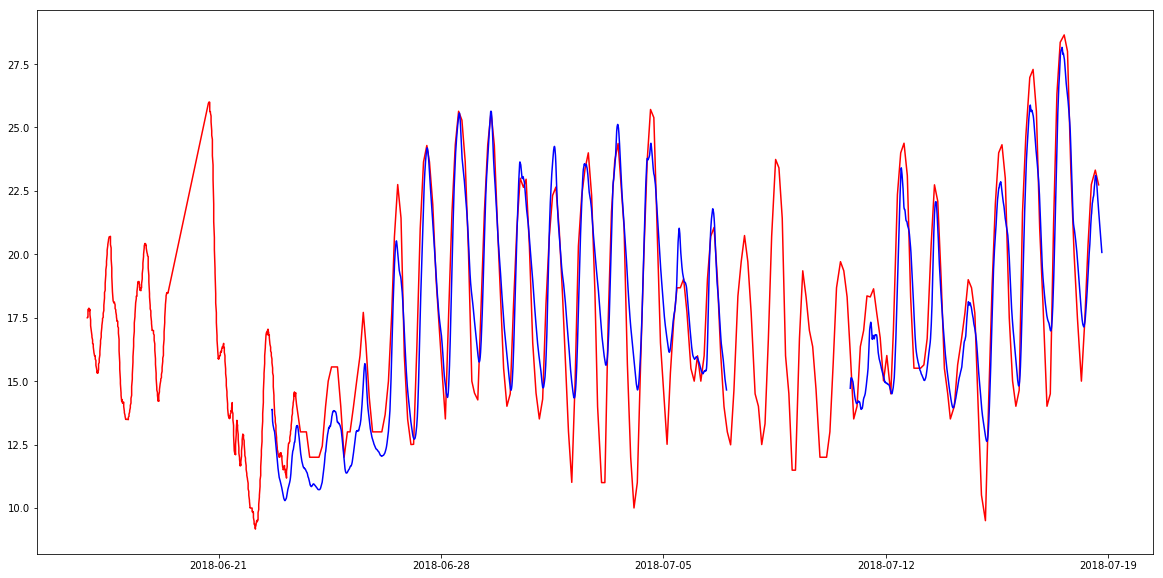

In [91]:
plt.figure(figsize=(20,10))
plt.plot(rolling_owm['temp'],'r-', rolling['temp']-15,'b-')

In [74]:
test_merge

AttributeError: 'DataFrame' object has no attribute 'is_monotonic'